# <font color='#922B21'><center> IRIS CLASSIFICATION   </center> </font>


## <font color='#7D3C98'>Table of Contents</font>

1. [Problem Statement](#1)
2. [Modules](#2)
3. [Helper Functions](#3)
4. [Loading, exploring and pre-processing data](#4)
5. [Build, compile and train the model](#5)
6. [Making predictions](#6)


<a name="1"></a>
## <font color='red'> 1. Problem Statement </font> 

### Background:
The Iris dataset is a classic dataset in the field of machine learning and statistics. It consists of 150 samples of iris flowers, each with four features (sepal length, sepal width, petal length, and petal width) and a target variable (species: Setosa, Versicolor, or Virginica). The goal of this project is to develop a machine learning model that can accurately classify iris flowers into their respective species based on their features.

### Problem:
Design and implement a classification model that can accurately classify iris flowers into one of three species: Setosa, Versicolor, or Virginica, based on their sepal and petal dimensions.

<a name="2"></a>
## <font color='red'> 2. Modules </font> 

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import warnings
warnings.filterwarnings('ignore')

In [46]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<a name="3"></a>
## <font color='red'>  3. Helper Functions </font> 

In [60]:
# plot history    
def plot_history(history, x_label_one, y_label_one, x_label_two, y_label_two):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot loss history
    axes[0].set_xlabel(x_label_one)
    axes[0].set_ylabel(y_label_one)
    axes[0].plot(hist['epoch'], hist['loss'], label='Train Error')
    axes[0].plot(hist['epoch'], hist['val_loss'], label='Val Error')
    axes[0].legend()

    # Plot accuracy history
    axes[1].set_xlabel(x_label_two)
    axes[1].set_ylabel(y_label_two)
    axes[1].plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    axes[1].plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')
    axes[1].legend()

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()




<a name="4"></a>
## <font color='red'>  4. Loading, exploring and pre-processing data </font> 

### Loading data

In [10]:
iris = load_iris()
X, y = iris.data, iris.target

### Exploring

In [22]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [11]:
X.shape, y.shape

((150, 4), (150,))

X has 150 samples with 4 features, y has 150 samples

In [19]:
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [21]:
y[:-10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

We can see that y contains 3 distinct integer values, each indicating a different type of flower; let's be more precise:

In [27]:
# Find unique values and their counts in y
unique_values, counts = np.unique(y, return_counts=True)
unique_values

array([0, 1, 2])

### Pre-processing

In [28]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit and transform
X_test_scaled = scaler.transform(X_test) # only fit

<a name="5"></a>
## <font color='red'> 5. Build, compile, train and evaluate a model</font>

In [33]:
# hyperparameters
learning_rate = 0.01
num_epochs = 100
batch_size = 32
num_features = X_train_scaled.shape[1]
num_classes = len(set(y_train))

In [52]:
def build_model(num_features):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(num_features,)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compilar el modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='sparse_categorical_crossentropy', # outputs are integers
                  metrics=['accuracy'])
    
    return model

In [53]:
model = build_model(num_features)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                50        
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, 
                    validation_split=0.2, 
                    epochs=num_epochs, 
                    batch_size=batch_size, 
                    verbose=0)

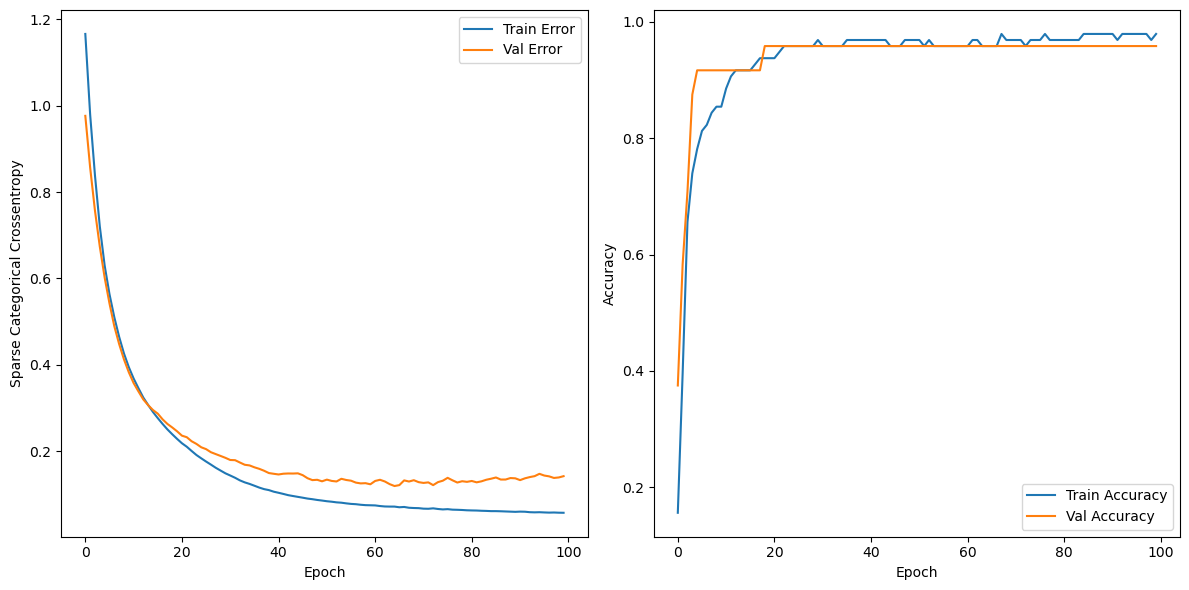

In [61]:
plot_history(history,'Epoch', 'Sparse Categorical Crossentropy', 'Epoch', 'Accuracy')

In [62]:
# evaluate
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Accuracy: {accuracy * 100:.2f}%')

1/1 - 0s - loss: 0.0425 - accuracy: 1.0000 - 16ms/epoch - 16ms/step
Accuracy: 100.00%


<a name="6"></a>
## <font color='red'> 6. Making predictions</font>

In [72]:
# predictions with the test data
predictions = model.predict(X_test_scaled)

print(f"\nShape {predictions.shape}")

predictions[:3] # first three


1/1 [==============================] - 0s 15ms/step

Shape (30, 3)


array([[5.7692965e-04, 9.9065799e-01, 8.7651033e-03],
       [9.9995977e-01, 2.8362683e-05, 1.1784702e-05],
       [3.4948748e-09, 1.0032017e-05, 9.9998993e-01]], dtype=float32)

We can observe that the predictions are probabilities; we will obtain the most probable class.

In [73]:
# Convert probabilities in classes
predicted_classes = tf.argmax(predictions, axis=1).numpy()

predicted_classes[:3]


array([1, 0, 2])

In [74]:
# Print some predictions and real labels
for i in range(10):
    print(f"Predicted class: {predicted_classes[i]}, Actual class: {y_test[i]}")



Predicted class: 1, Actual class: 1
Predicted class: 0, Actual class: 0
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1
Predicted class: 1, Actual class: 1
Predicted class: 0, Actual class: 0
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1
Predicted class: 1, Actual class: 1
